In [0]:
#select the tensor flow version 2
%tensorflow_version 2.x 

In [0]:
#import the required moduls
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [21]:
#import the dataset
data = pd.read_csv('/content/drive/My Drive/Bangkit Project/MLCC/fake_job_postings.csv')
data.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


#Data Analysis and Data Cleaning

In [22]:
#cheking for the null or Nan Values
data.isnull().sum()/data.shape[0]*100

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

job_id didnt give us any informations, and salary_range has too many null or Nan value (84%). so drop these columns

In [0]:
#drop unused columns
data = data.drop(['job_id','salary_range'],axis=1)

In [24]:
#cheking department column
data.department.isnull().sum()

11547

there is 11.547 null or Nan value in department column, fill this value with "other" category (unspecified department)

In [0]:
#fill "other" category to department column
data.department = data.department.fillna(value='other')

In [26]:
#chek the required_education 
data.required_education.isnull().sum()/data.shape[0]

0.4532997762863535

45.3% of required_education value is null or Nan value, fill this value with "other" category (no need specific education background)

In [0]:
#fill "other" category to required_education column
data.required_education = data.required_education.fillna(value='other')

In [28]:
data.required_experience.isnull().sum()/data.shape[0]*100

39.42953020134228

In [29]:
data.required_experience.value_counts()

Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

39% of required_experience is null or Nan value, but there is no "other" category for required experience. All possible category are already exist. so I will drop the null or Nan value.

In [30]:
data.head(3)

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,other,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,other,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",other,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,other,NaN,NaN,0


company_profile,description, requirements, benefits columns are note categorical or numerical, so drop these columns

In [0]:
data = data.drop(['company_profile','description','benefits','requirements'],axis=1)

In [0]:
#drop all Nan or null value
data = data.dropna()

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9054 entries, 1 to 17879
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                9054 non-null   object
 1   location             9054 non-null   object
 2   department           9054 non-null   object
 3   telecommuting        9054 non-null   int64 
 4   has_company_logo     9054 non-null   int64 
 5   has_questions        9054 non-null   int64 
 6   employment_type      9054 non-null   object
 7   required_experience  9054 non-null   object
 8   required_education   9054 non-null   object
 9   industry             9054 non-null   object
 10  function             9054 non-null   object
 11  fraudulent           9054 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 919.5+ KB


#Data Preparation

In [0]:
#split the dataset into 3 parts 
train, test = train_test_split(data, test_size=0.2)
train, validation = train_test_split(train, test_size=0.2)

In [0]:
# use tf.data
def convert_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('fraudulent')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [0]:
train_ds = convert_to_dataset(train)
test_ds = convert_to_dataset(test)
validation_ds = convert_to_dataset(validation)

In [37]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch of fraudulent:', label_batch )

Every feature: ['title', 'location', 'department', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']
A batch of fraudulent: tf.Tensor([0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int64)


In [38]:
data.columns

Index(['title', 'location', 'department', 'telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent'],
      dtype='object')

In [0]:
#create one-hot encoding for all categorical feature

department = feature_column.categorical_column_with_vocabulary_list(
      'department', data.department.value_counts().index)
one_hot_department = feature_column.indicator_column(department)

title = feature_column.categorical_column_with_vocabulary_list(
      'title', data.title.value_counts().index)
one_hot_title = feature_column.indicator_column(title)

location = feature_column.categorical_column_with_vocabulary_list(
      'location', data.location.value_counts().index)
one_hot_location = feature_column.indicator_column(location)

telecommuting = feature_column.categorical_column_with_vocabulary_list(
      'telecommuting', data.telecommuting.value_counts().index)
one_hot_telecommuting = feature_column.indicator_column(telecommuting)

has_company_logo = feature_column.categorical_column_with_vocabulary_list(
      'has_company_logo', data.has_company_logo.value_counts().index)
one_hot_has_company_logo = feature_column.indicator_column(has_company_logo)

has_questions = feature_column.categorical_column_with_vocabulary_list(
      'has_questions', data.has_questions.value_counts().index)
one_hot_has_question = feature_column.indicator_column(has_questions)

employment_type = feature_column.categorical_column_with_vocabulary_list(
      'employment_type', data.employment_type.value_counts().index)
one_hot_employment_type = feature_column.indicator_column(employment_type)

required_experience = feature_column.categorical_column_with_vocabulary_list(
      'required_experience', data.required_experience.value_counts().index)
one_hot_required_experience = feature_column.indicator_column(required_experience)

required_education = feature_column.categorical_column_with_vocabulary_list(
      'required_education', data.required_education.value_counts().index)
one_hot_required_education = feature_column.indicator_column(required_education)

industry = feature_column.categorical_column_with_vocabulary_list(
      'industry', data.industry.value_counts().index)
one_hot_industry = feature_column.indicator_column(industry)

function = feature_column.categorical_column_with_vocabulary_list(
      'function', data.function.value_counts().index)
one_hot_function = feature_column.indicator_column(function)

In [40]:
#create a feature layer
feature_columns = []

feature_columns.append(one_hot_department)
feature_columns.append(one_hot_employment_type)
feature_columns.append(one_hot_function)
feature_columns.append(one_hot_has_company_logo)
feature_columns.append(one_hot_has_question)
feature_columns.append(one_hot_industry)
feature_columns.append(one_hot_location)
feature_columns.append(one_hot_required_education)
feature_columns.append(one_hot_required_experience)
feature_columns.append(one_hot_telecommuting)
feature_columns.append(one_hot_title)

feature_layer = layers.DenseFeatures(feature_columns)

feature_layer(dict(train))

<tf.Tensor: shape=(5794, 8958), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

#Build Model

##First Model
  > This model using sequential model and sigmoid function as activation function.

In [0]:
# define function to create and train the model
def create_model(learning_rate, feature_layer, my_metrics):

  model = tf.keras.models.Sequential()

  model.add(feature_layer)

  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid),)

  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

  return model        

def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name)) 
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)
  
  epochs = history.epoch

  hist = pd.DataFrame(history.history)

  return epochs, hist  

In [0]:
def plot_curve(epochs, hist):
  
  fig = plt.figure(figsize=(18,6))

  plt.subplot2grid((2,3),(0,0))
  plt.plot(epochs, hist.loss)
  plt.title('Loss curve')
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  plt.subplot2grid((2,3),(0,1))
  plt.plot(epochs, hist.accuracy)
  plt.title('Accuracy curve')
  plt.xlabel("Epoch")
  plt.ylabel("Value")


In [95]:
#setting hyperparameter value
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = "fraudulent"
classification_threshold = 0.45

METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
          ]

model1 = create_model(learning_rate, feature_layer, METRICS)

epochs1, hist1 = train_model(model1, train, epochs, 
                           label_name, batch_size)
 

Epoch 1/30
58/58 [==============================] - 0s 5ms/step - loss: 0.1302 - accuracy: 0.9491
Epoch 2/30
58/58 [==============================] - 0s 4ms/step - loss: 0.0709 - accuracy: 0.9777
Epoch 3/30
58/58 [==============================] - 0s 4ms/step - loss: 0.0519 - accuracy: 0.9822
Epoch 4/30
58/58 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9864
Epoch 5/30
58/58 [==============================] - 0s 4ms/step - loss: 0.0331 - accuracy: 0.9895
Epoch 6/30
58/58 [==============================] - 0s 4ms/step - loss: 0.0274 - accuracy: 0.9912
Epoch 7/30
58/58 [==============================] - 0s 4ms/step - loss: 0.0230 - accuracy: 0.9929
Epoch 8/30
58/58 [==============================] - 0s 4ms/step - loss: 0.0192 - accuracy: 0.9943
Epoch 9/30
58/58 [==============================] - 0s 4ms/step - loss: 0.0160 - accuracy: 0.9953
Epoch 10/30
58/58 [==============================] - 0s 4ms/step - loss: 0.0138 - accuracy: 0.9960
Epoch 11/30
58/58 [

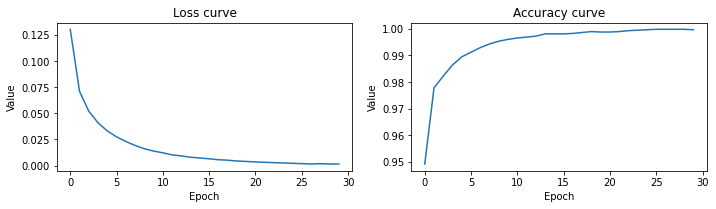

In [96]:
plot_curve(epochs1, hist1)

In [114]:
features = {name:np.array(value) for name, value in test.items()}
label = np.array(features.pop(label_name))

model1.evaluate(x = features, y = label, batch_size=batch_size)

19/19 [==============================] - 0s 4ms/step - loss: 0.1376 - accuracy: 0.9525


[0.1375526636838913, 0.9525124430656433]

## Second Model

In [0]:
def create_model2(learning_rate, feature_layer, my_metrics):

  model = tf.keras.models.Sequential()

  model.add(feature_layer)

  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.keras.activations.relu),)

  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

  return model

In [112]:
#setting hyperparameter value
learning_rate = 0.01
epochs = 30
batch_size = 100
label_name = "fraudulent"
classification_threshold = 0.4

METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
          ]

model2 = create_model2(learning_rate, feature_layer, METRICS)

epochs2, hist2 = train_model(model2, train, epochs, 
                           label_name, batch_size)

Epoch 1/30
58/58 [==============================] - 0s 4ms/step - loss: 0.2489 - accuracy: 0.9641
Epoch 2/30
58/58 [==============================] - 0s 5ms/step - loss: 0.1812 - accuracy: 0.9758
Epoch 3/30
58/58 [==============================] - 0s 4ms/step - loss: 0.1533 - accuracy: 0.9808
Epoch 4/30
58/58 [==============================] - 0s 5ms/step - loss: 0.1309 - accuracy: 0.9852
Epoch 5/30
58/58 [==============================] - 0s 5ms/step - loss: 0.1249 - accuracy: 0.9876
Epoch 6/30
58/58 [==============================] - 0s 5ms/step - loss: 0.1162 - accuracy: 0.9888
Epoch 7/30
58/58 [==============================] - 0s 4ms/step - loss: 0.1125 - accuracy: 0.9903
Epoch 8/30
58/58 [==============================] - 0s 4ms/step - loss: 0.1062 - accuracy: 0.9912
Epoch 9/30
58/58 [==============================] - 0s 5ms/step - loss: 0.0990 - accuracy: 0.9914
Epoch 10/30
58/58 [==============================] - 0s 5ms/step - loss: 0.0972 - accuracy: 0.9924
Epoch 11/30
58/58 [

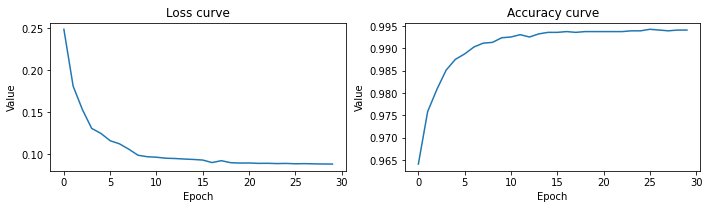

In [113]:
 plot_curve(epochs2, hist2)

In [115]:
model2.evaluate(x = features, y = label, batch_size=batch_size)

19/19 [==============================] - 0s 4ms/step - loss: 0.1581 - accuracy: 0.9807


[0.15807317197322845, 0.9806736707687378]

# Third Model

In [0]:
def create_model3(learning_rate, feature_layer):
  model = tf.keras.models.Sequential()
  model.add(feature_layer)   
  model.add(tf.keras.layers.Dense(units=20, 
                                  activation='relu', 
                                  name='Hidden1'))
  
  model.add(tf.keras.layers.Dense(units=12, 
                                  activation='relu', 
                                  name='Hidden2'))
  
  model.add(tf.keras.layers.Dense(units=10, 
                                  activation='relu', 
                                  name='Hidden3'))
  model.add(tf.keras.layers.Dense(units=6, 
                                  activation='relu', 
                                  name='Hidden4'))
      
  model.add(tf.keras.layers.Dense(units=1,  
                                  name='Output'))                              
  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                loss="mean_squared_error",
                metrics=['accuracy'])

  return model

In [124]:
learning_rate = 0.01
epochs = 20
batch_size = 1000
label_name = "fraudulent"

model3 = create_model3(learning_rate, feature_layer)

epochs3, accuracy = train_model(model3, train, epochs, 
                          label_name, batch_size)

Epoch 1/20
6/6 [==============================] - 0s 50ms/step - loss: 0.0383 - accuracy: 0.9608
Epoch 2/20
6/6 [==============================] - 0s 48ms/step - loss: 0.0375 - accuracy: 0.9608
Epoch 3/20
6/6 [==============================] - 0s 48ms/step - loss: 0.0378 - accuracy: 0.9608
Epoch 4/20
6/6 [==============================] - 0s 48ms/step - loss: 0.0369 - accuracy: 0.9608
Epoch 5/20
6/6 [==============================] - 0s 48ms/step - loss: 0.0336 - accuracy: 0.9608
Epoch 6/20
6/6 [==============================] - 0s 48ms/step - loss: 0.0217 - accuracy: 0.9663
Epoch 7/20
6/6 [==============================] - 0s 50ms/step - loss: 0.0095 - accuracy: 0.9891
Epoch 8/20
6/6 [==============================] - 0s 47ms/step - loss: 0.0046 - accuracy: 0.9962
Epoch 9/20
6/6 [==============================] - 0s 48ms/step - loss: 0.0023 - accuracy: 0.9984
Epoch 10/20
6/6 [==============================] - 0s 49ms/step - loss: 0.0013 - accuracy: 0.9993
Epoch 11/20
6/6 [============

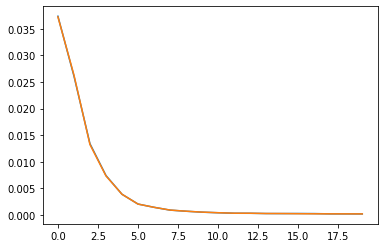

In [125]:
plt.plot(epochs3,mse)

In [126]:
test_features = {name:np.array(value) for name, value in test.items()}
test_label = np.array(test_features.pop(label_name)) 
model3.evaluate(x = test_features, y = test_label, batch_size=batch_size)

2/2 [==============================] - 0s 15ms/step - loss: 0.0184 - accuracy: 0.9774


[0.018389100208878517, 0.9773605465888977]

# Validation

In [127]:
features = {name:np.array(value) for name, value in validation.items()}
label = np.array(features.pop(label_name))

print('Evaluate Model 1 with Validation set : ')
model1.evaluate(x = features, y = label, batch_size=batch_size)
print('Evaluate Model 2 with Validation set : ')
model2.evaluate(x = features, y = label, batch_size=batch_size)
print('Evaluate Model 3 with Validation set : ')
model3.evaluate(x = features, y = label, batch_size=batch_size)

Evaluate Model 1 with Validation set : 
2/2 [==============================] - 0s 7ms/step - loss: 0.1443 - accuracy: 0.9558
Evaluate Model 2 with Validation set : 
2/2 [==============================] - 0s 8ms/step - loss: 0.1268 - accuracy: 0.9800
Evaluate Model 3 with Validation set : 
2/2 [==============================] - 0s 10ms/step - loss: 0.0187 - accuracy: 0.9752


[0.018659548833966255, 0.9751552939414978]

Model 2 performing better than two others with 98% accuracy